# MC866 Project 1

## PART I - Clustering Methods

### K-Means
API based on sklearn implementation of K-Means

In [193]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math

In [336]:
class KMeans:
    def __init__(self, X, n_clusters=5, random_state=None):
        self.n_clusters = n_clusters
        self.X = X
        self.rand = np.random.RandomState(random_state)
        self.centroids = []

    def init_centroids(self):
        self.centroids = self.rand.permutation(self.X)[:self.n_clusters]

    # returns an array of what cluster each point of the dataset belongs to
    def clusters(self): 
        distances = np.array([])
        for c in self.centroids:
            def euclidian_distance(x): 
                sum = np.sum(np.apply_along_axis(lambda p: np.power(p[0] - p[1], 2), 1, np.column_stack((x, c)))) # sum of the square of the difference of each feature to the corresponding centroid feature
                return np.sqrt(sum) # sqrt the root to find the euclidian distance
            d = np.apply_along_axis(euclidian_distance, 1, self.X)
            distances = np.append(distances, d)
        distances = distances.reshape((self.n_clusters,len(self.X)))
        distances = distances.T # list of distances of each centroid to the element in the given index (equivalent to zip(*distances) but faster)
        return np.apply_along_axis(np.argmin,1, distances) # the index of which centroid each data point belongs to

    def fit(self):
        while True:
            clusters = self.clusters()
            points_with_clusters = np.column_stack((clusters, self.X))
            points_with_clusters.sort(axis=0)
            grouped_points = np.split(points_with_clusters[:,1], np.unique(points_with_clusters[:, 0], return_index=True)[1][1:])
            print(grouped_points)

            



In [337]:
df = pd.read_csv("./data/cluster.dat", sep=' ', header=None)
df.head()

,0,1
0,1555.0,28.65
1,1490.0,27.55
2,1445.0,28.35
3,1415.0,28.80
4,1375.0,28.05


In [338]:
k = KMeans(X=df.to_numpy(),n_clusters=3)

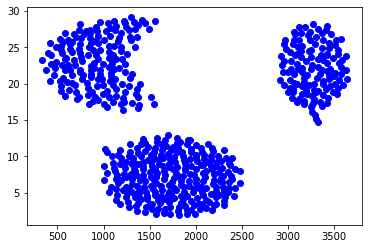

In [339]:
# 2D dataset

fig, ax = plt.subplots()
ax.scatter(df.iloc[:,:1].values,df.iloc[:,1:].values, c="blue") # the data
plt.show()

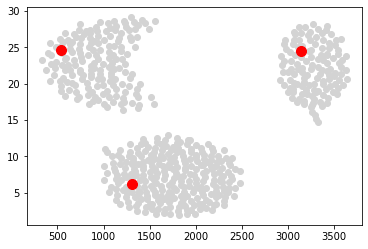

In [348]:
# initialize centroids and show their initial position in the chart
k.init_centroids()

fig, ax = plt.subplots()
ax.scatter(df.iloc[:,:1].values,df.iloc[:,1:].values, c="lightgray") # the data
ax.scatter(k.centroids[:,:1],k.centroids[:,1:], c="red", s=100) # the data
plt.show()

In [349]:
k.clusters()

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

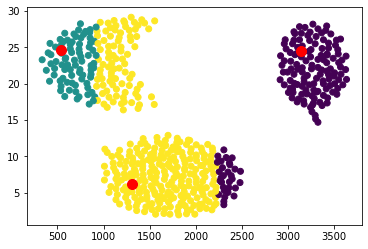

In [350]:
# Result of clusters before any fitting is done

c = k.clusters()

fig, ax = plt.subplots()
ax.scatter(df.iloc[:,:1].values,df.iloc[:,1:].values, c=c) # the data
ax.scatter(k.centroids[:,:1],k.centroids[:,1:], c="red", s=100) # the data
plt.show()

In [351]:
k.fit()

725., 1725., 1730., 1730.,
       1735., 1740., 1750., 1755., 1760., 1760., 1765., 1765., 1780.,
       1785., 1790., 1795., 1800., 1800., 1800., 1805., 1805., 1810.,
       1815., 1815., 1830., 1840., 1840., 1840., 1845., 1850., 1860.,
       1860., 1865., 1865., 1865., 1870., 1875., 1875., 1880., 1880.,
       1885., 1885., 1900., 1900., 1910., 1910., 1920., 1925., 1925.,
       1935., 1940., 1940., 1945., 1945., 1945., 1950., 1950., 1975.,
       1980., 1980., 1985., 1990., 2000., 2005., 2005., 2005., 2005.,
       2005., 2010., 2015., 2040., 2040., 2045., 2055., 2055., 2060.,
       2070., 2070., 2070., 2075., 2075., 2075., 2080., 2090., 2095.,
       2100., 2110., 2110., 2115., 2115., 2120., 2130., 2145., 2165.,
       2165., 2165., 2165., 2175., 2175., 2180., 2185., 2185., 2195.,
       2200., 2200., 2215., 2215., 2220., 2220., 2220., 2235., 2240.,
       2250., 2255., 2265., 2275., 2275., 2280., 2290., 2300., 2300.,
       2305., 2305., 2305., 2310., 2315., 2330., 2350., 2350., 

KeyboardInterrupt: 